In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# مسار الفولدر
dataset_path = '/content/drive/My Drive'

# مسارات الفئات
healthy_dir = f'{dataset_path}/Healthy'
tumor_dir = f'{dataset_path}/Tumor'

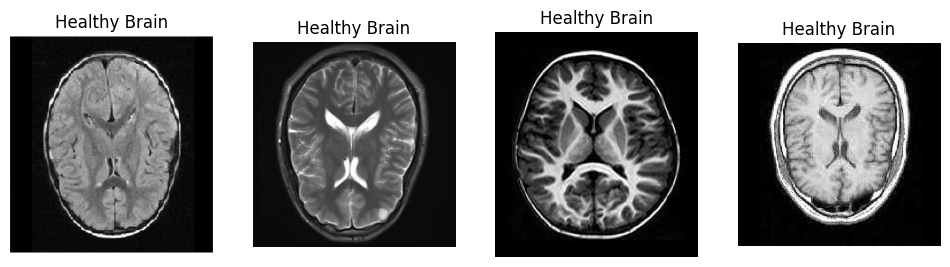

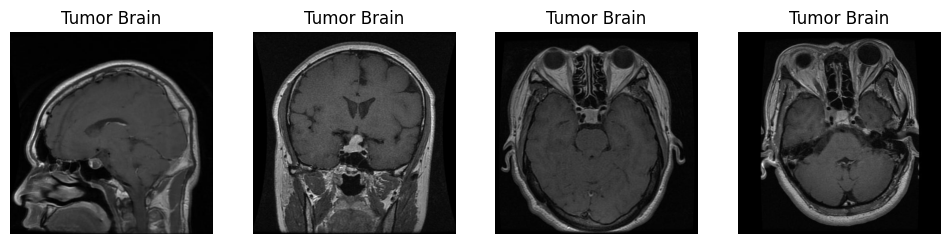

In [ ]:
# عرض الصور
def display_samples(image_dir, title, num_samples=4):
    plt.figure(figsize=(12, 6))
    for i, img_file in enumerate(os.listdir(image_dir)[:num_samples]):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(title)
    plt.show()

# عينات
display_samples(healthy_dir, "Healthy_Brain", 4)
display_samples(tumor_dir, "Tumor_Brain", 4)

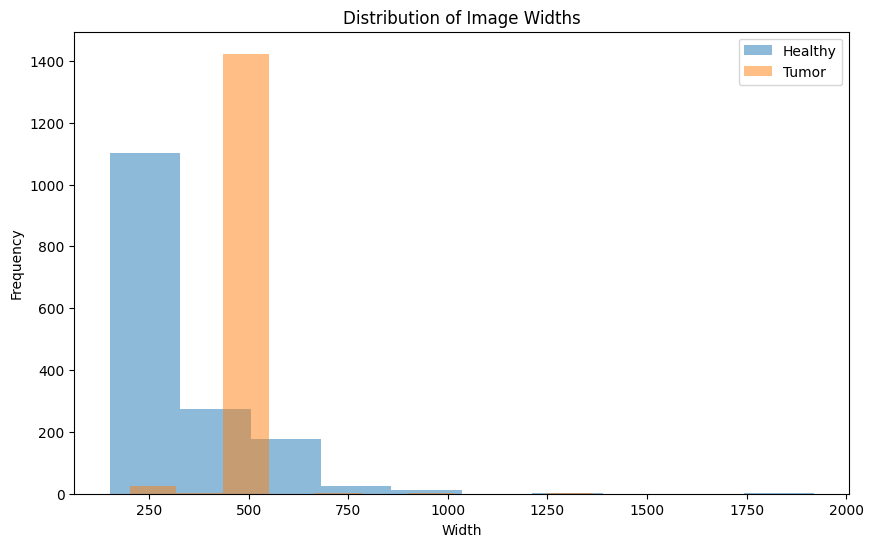

In [ ]:
from collections import Counter

def image_dimensions(image_dir):
    dimensions = []
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path)
        dimensions.append(img.size)
    return dimensions

healthy_dims = image_dimensions(healthy_dir)
tumor_dims = image_dimensions(tumor_dir)

# عرض التوزيع
plt.figure(figsize=(10, 6))
plt.hist([d[0] for d in healthy_dims], alpha=0.5, label="Healthy")
plt.hist([d[0] for d in tumor_dims], alpha=0.5, label="Tumor")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths")
plt.legend()
plt.show()




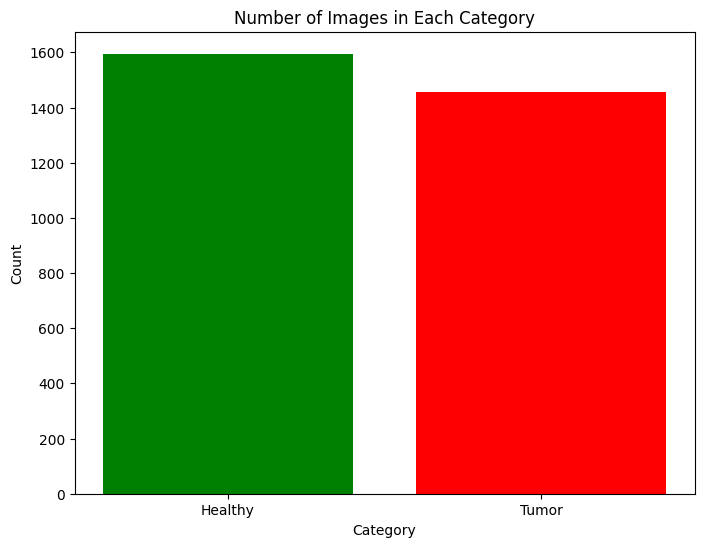

In [ ]:
categories = ["Healthy", "Tumor"]
counts = [len(os.listdir(healthy_dir)), len(os.listdir(tumor_dir))]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['green', 'red'])
plt.title("Number_of Images_in_Each_Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


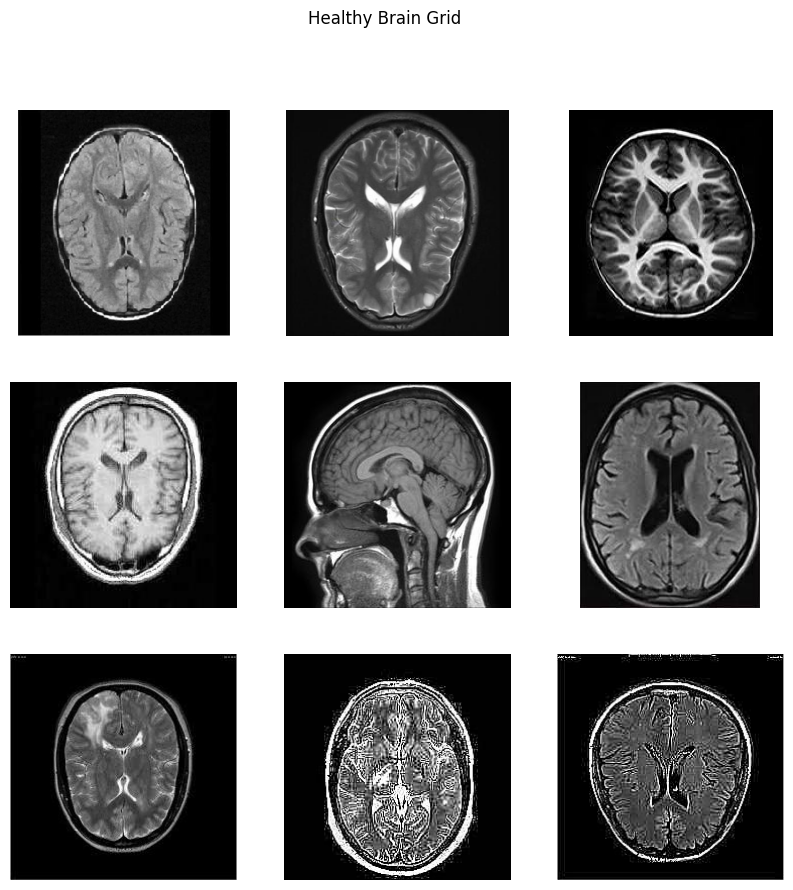

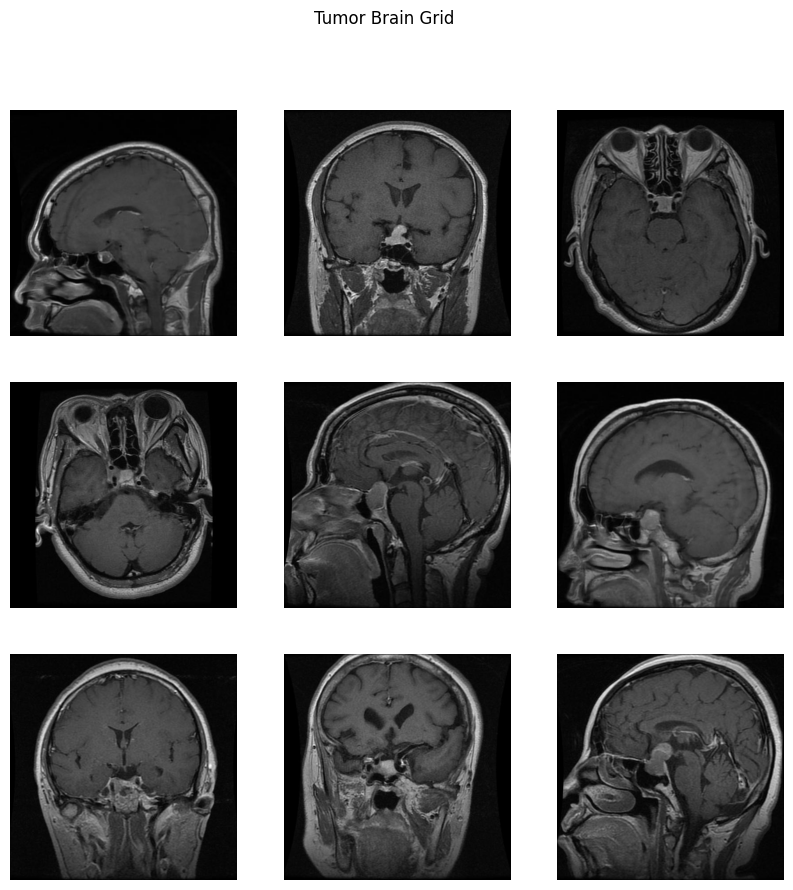

In [ ]:
def display_grid(image_dir, title, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, img_file in enumerate(os.listdir(image_dir)[:num_images]):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path)
        plt.subplot(3, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_grid(healthy_dir, "Healthy_Brain_Grid")
display_grid(tumor_dir, "Tumor_Brain_Grid")




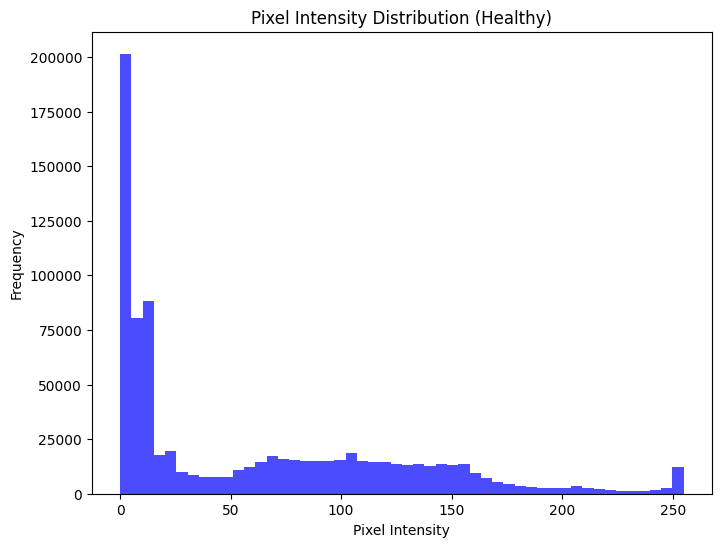

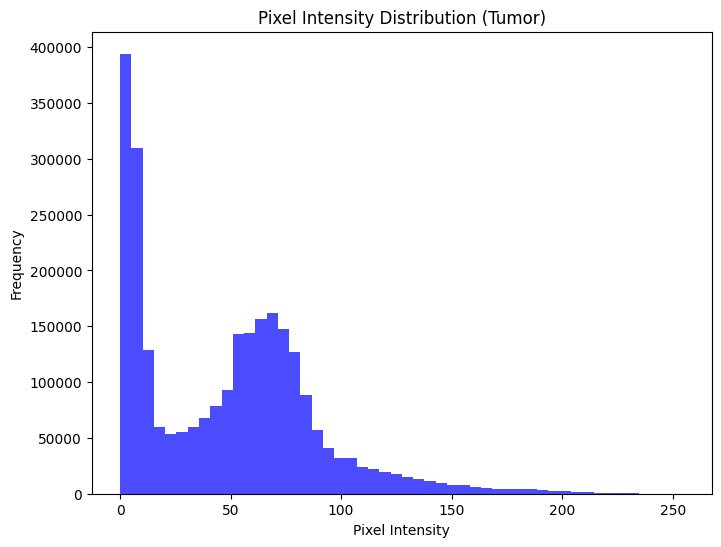

In [ ]:
import numpy as np

def plot_histogram(image_dir, title):
    pixel_values = []
    for img_file in os.listdir(image_dir)[:10]:  # تحليل أول 10 صور فقط لتوفير الوقت
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path).convert('L')
        pixel_values.extend(np.array(img).flatten())
    plt.figure(figsize=(8, 6))
    plt.hist(pixel_values, bins=50, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(healthy_dir, "Pixel_ntensity_Distribution_(Healthy)")
plot_histogram(tumor_dir, "Pixel_Intensity_Distribution_(Tumor)")




In [ ]:
def calculate_average_image(image_dir):
    images = []
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path).convert('L')
        images.append(np.array(img, dtype=np.float32))
    avg_image = np.mean(images, axis=0)
    return avg_image

avg_healthy = calculate_average_image(healthy_dir)
avg_tumor = calculate_average_image(tumor_dir)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(avg_healthy, cmap='gray')
plt.title("Average Healthy Brain")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(avg_tumor, cmap='gray')
plt.title("Average Tumor Brain")
plt.axis('off')

plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1595,) + inhomogeneous part.

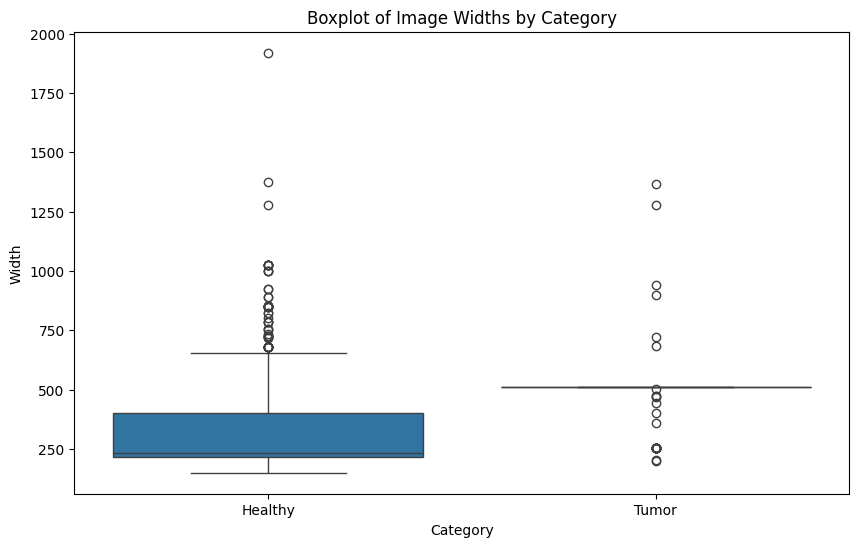

In [ ]:
import seaborn as sns

data = {"Category": ["Healthy"] * len(healthy_dims) + ["Tumor"] * len(tumor_dims),
        "Width": [d[0] for d in healthy_dims] + [d[0] for d in tumor_dims],
        "Height": [d[1] for d in healthy_dims] + [d[1] for d in tumor_dims]}

import pandas as pd
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Category", y="Width", data=df)
plt.title("Boxplot_of_Image_Widths_by_Category")
plt.show()




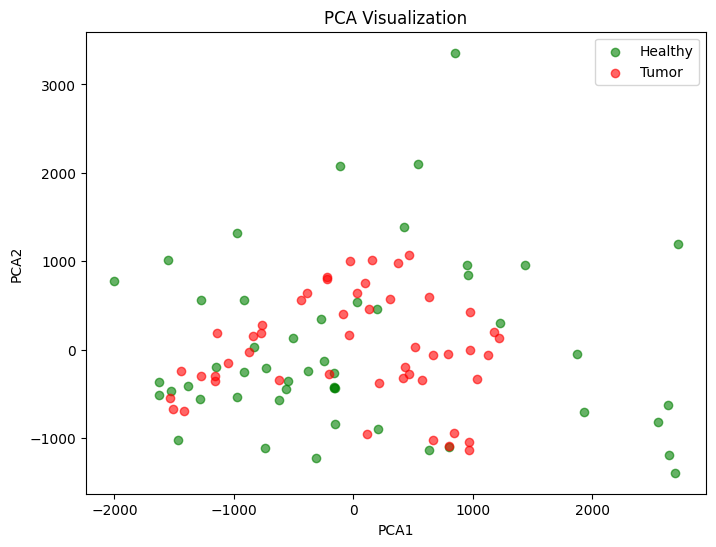

In [ ]:
from sklearn.decomposition import PCA

def apply_pca(image_dir, num_images=50):
    images = []
    for img_file in os.listdir(image_dir)[:num_images]:
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path).convert('L').resize((64, 64))
        images.append(np.array(img).flatten())
    pca = PCA(n_components=2)
    return pca.fit_transform(images)

pca_healthy = apply_pca(healthy_dir)
pca_tumor = apply_pca(tumor_dir)

plt.figure(figsize=(8, 6))
plt.scatter(pca_healthy[:, 0], pca_healthy[:, 1], label="Healthy", alpha=0.6, c='green')
plt.scatter(pca_tumor[:, 0], pca_tumor[:, 1], label="Tumor", alpha=0.6, c='red')
plt.title("PCA_Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()
